# Web Scraping

## Introduccion

El **web scraping** es una técnica utilizada para extraer información de páginas web, especialmente cuando los datos no están estructurados en formatos como archivos .csv o bases de datos.

Para acceder a una página web desde Python, es necesario realizar una solicitud (request) al servidor. Para esto, se utiliza la librería de Python: Requests. Esta librería permite enviar solicitudes a través del protocolo HTTP y obtener el contenido de una página.

Es importante saber que cada vez que ejecutamos el comando get estamos enviando una consulta al servidor. Hay que ser responsables en el uso de las consultas ya que si se ejecutan demasiadas pueden generar problemas en el servidor o incluso pueden bloquear nuestra IP por uso indebido.

In [2]:
import requests

In [3]:
url = "https://lcd.exactas.uba.ar/materias/"

r = requests.get(url)
r.text

'<!DOCTYPE html>\n<html class="no-overflow-y avada-html-layout-wide avada-html-header-position-top avada-is-100-percent-template avada-header-color-not-opaque" lang="es-AR" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n\t<meta name="viewport" content="width=device-width, initial-scale=1" />\n\t<title>Plan de estudios &#8211; Licenciatura en Datos &#8211; Exactas &#8211; UBA</title>\n\t\t<style>\r\n\t\t#wpadminbar #wp-admin-bar-cp_plugins_top_button .ab-icon:before {\r\n\t\t\tcontent: "\\f533";\r\n\t\t\ttop: 3px;\r\n\t\t}\r\n\t\t#wpadminbar #wp-admin-bar-cp_plugins_top_button .ab-icon {\r\n\t\t\ttransform: rotate(45deg);\r\n\t\t}\r\n\t\t</style>\r\n\t<style>\n#wpadminbar #wp-admin-bar-vtrts_free_top_button .ab-icon:before {\n\tcontent: "\\f185";\n\tcolor: #1DAE22;\n\ttop: 3px;\n}\n</style><meta name="dlm-version" content="4.8.2"><link rel

### Status Code

Al hacer una solicitud se nos pueden devolver distintos tipos de códigos de estado. Si el código es del tipo 2** entonces está asociado a una solicitud exitosa. Si es de tipo 4** implica un error del cliente, por ejemplo, el famoso 404 que ocurre cuando intentamos acceder a un dominio inexistente. Por último, si el error es de tipo 5** implica un error en el servidor.

In [4]:
print(r.status_code)

200


In [6]:
url2 = "https://lcd.exactas.uba.ar/materiassss/"

print(requests.get(url2).status_code)

404


La respuesta que obtenemos del servidor es un string con todo el código HTML. Para poder utilizar este código de manera más sencilla es necesario usar un parser (es decir, un analizador semántico) que reconstruya la estructura del HTML y nos permita navegar más facilmente.

In [7]:
print(len(r.text))
r.text

122184


'<!DOCTYPE html>\n<html class="no-overflow-y avada-html-layout-wide avada-html-header-position-top avada-is-100-percent-template avada-header-color-not-opaque" lang="es-AR" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">\n<head>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n\t<meta name="viewport" content="width=device-width, initial-scale=1" />\n\t<title>Plan de estudios &#8211; Licenciatura en Datos &#8211; Exactas &#8211; UBA</title>\n\t\t<style>\r\n\t\t#wpadminbar #wp-admin-bar-cp_plugins_top_button .ab-icon:before {\r\n\t\t\tcontent: "\\f533";\r\n\t\t\ttop: 3px;\r\n\t\t}\r\n\t\t#wpadminbar #wp-admin-bar-cp_plugins_top_button .ab-icon {\r\n\t\t\ttransform: rotate(45deg);\r\n\t\t}\r\n\t\t</style>\r\n\t<style>\n#wpadminbar #wp-admin-bar-vtrts_free_top_button .ab-icon:before {\n\tcontent: "\\f185";\n\tcolor: #1DAE22;\n\ttop: 3px;\n}\n</style><meta name="dlm-version" content="4.8.2"><link rel

### Parsers

Para poder parsear el código vamos a usar la librería **BeautifulSoup** de Python. Junto a ella hay q elegir un *parser*. Se pueden usar varios como 'html.parser' o 'lxml'.

Pueden buscar mas información de la librería en la [documentación](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

In [10]:
from bs4 import BeautifulSoup

In [11]:
materias = BeautifulSoup(r.text, 'html.parser')
materias

<!DOCTYPE html>

<html class="no-overflow-y avada-html-layout-wide avada-html-header-position-top avada-is-100-percent-template avada-header-color-not-opaque" lang="es-AR" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#">
<head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Plan de estudios – Licenciatura en Datos – Exactas – UBA</title>
<style>
		#wpadminbar #wp-admin-bar-cp_plugins_top_button .ab-icon:before {
			content: "\f533";
			top: 3px;
		}
		#wpadminbar #wp-admin-bar-cp_plugins_top_button .ab-icon {
			transform: rotate(45deg);
		}
		</style>
<style>
#wpadminbar #wp-admin-bar-vtrts_free_top_button .ab-icon:before {
	content: "\f185";
	color: #1DAE22;
	top: 3px;
}
</style><meta content="4.8.2" name="dlm-version"/><link href="//s.w.org" rel="dns-prefetch"/>
<link href="https://lcd.exactas.uba.ar/feed/" rel="alternate" 

## Estructura HTML

Un elemento de HTML es la estructura más básica de HTML. Estos contienen una **etiqueta** (tag) que le define ciertas propiedades. Algunas etiquetas comunes son:

*   \<p>: para escribir texto en formato de parrafos
*   \<h1>, \<h2>, \<h3>: usado para titulos y subtitulos
*   \<a>: para hipervínculos
*   \<img>: para insertar imagenes
*   \<ol>, \<ul>, \<li>: para definir listar ordenadas (ordered list), listas no ordenadas (unordered list) y elementos de las listas respectivamente

Cada elemento a su vez, admite atributos. Uno muy común es la *clase* que permite agrupar elementos dentro de un mismo tipo para podes darles un formato visual similar. Otros pueden ser *width*, *height* o *src*.

Además, cada elemento puede tener elementos dentro, obteniendo así una estructura arbolada.

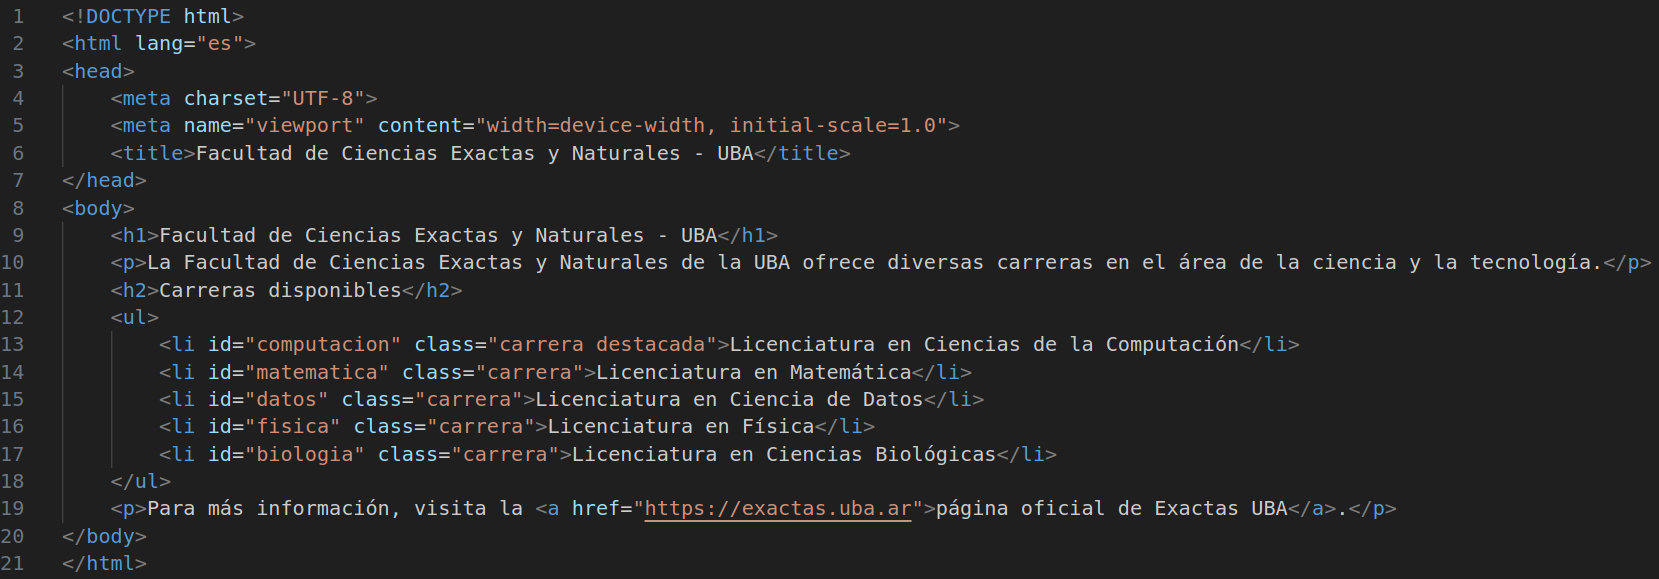

## Herramientas para extraer información

Para buscar elementos de HTML dentro de python contamos con las funciones find() y find_all(). La primera devuelve el primer elemento que cumple con las condiciones pedidas en los parámetros y la segunda devuelve una lista con todos los elementos encontrados. Cabe notar que los elementos obtenidos incluyen todos los hijos que tienen.

El primer parámetro (opcional) corresponde a una etiqueta de HTML.
Luego se le puede pasar un diccionario con los atributos que queremos que cumpla el elemento en cuestión.

Pero para encontrar algo primero tenemos que saber que estamos buscando. Para eso, hay que investigar la página de la que queremos extraer la información. Usando el comando f12 podemos acceder al código HTML de una página y ver como está estructurado. También se puede hacer click derecho en un elemento, seleccionar inspeccionar y se abre la misma pestaña pero centrada en ese elemento.

De ahí podemos obtener información relevante como los nombres de las clases, los id y la estructura de la página.

In [12]:
materias.find('h2')

<h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Datos</h2>

In [ ]:
materias.find_all('p')[0]

In [14]:
materias.find_all('h3')

[<h3 class="title-heading-center" style="margin:0;line-height:72px;"><span class="fusion-animated-text-prefix">CBC </span> <span class="fusion-animated-texts-wrapper" data-length="line" data-mindisplaytime="1200" style="font-size:30px;"><span class="fusion-animated-texts"><span class="fusion-animated-text" data-in-effect="clipIn" data-in-sequence="true" data-out-effect="clipOut" data-out-reverse="true">Ciclo Básico Común</span></span></span> <span class="fusion-animated-text-postfix"></span></h3>,
 <h3 class="title-heading-center" style="margin:0;line-height:72px;"><span class="fusion-animated-text-prefix"></span> <span class="fusion-animated-texts-wrapper" data-length="line" data-mindisplaytime="1200" style="font-size:30px;"><span class="fusion-animated-texts"><span class="fusion-animated-text" data-in-effect="clipIn" data-in-sequence="true" data-out-effect="clipOut" data-out-reverse="true">Segundo Ciclo de Grado</span></span></span> <span class="fusion-animated-text-postfix"></span><

In [ ]:
#materias.find_all(attrs = {'class':'table'})
#materias.find_all(attrs = {'width':'73'})
materias.find_all('td',attrs={'width': '73'})

[<td width="73"><strong>Cuatrimestre</strong></td>,
 <td width="73">3</td>,
 <td width="73">3</td>,
 <td width="73">4</td>,
 <td width="73">4</td>,
 <td width="73">5</td>,
 <td width="73">5</td>,
 <td width="73">5</td>,
 <td width="73">6</td>,
 <td width="73">6</td>,
 <td width="73">7</td>,
 <td width="73">7</td>,
 <td width="73">8</td>,
 <td width="73">8</td>,
 <td width="73">8</td>]

In [15]:
materias.find_all(attrs={'class':'flip-box-heading-back'})
materias.find_all('h3', attrs={'class':'flip-box-heading-back'})

[<h3 class="flip-box-heading-back" style="color:#ffffff;">Datos</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Investigación operativa y Optimización</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Estadística matemática-computacional</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Modelado continuo</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Sistemas estocásticos y complejos</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Inteligencia Artificial</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Procesamiento de Señales</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Cs. de la atmósfera</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Bioinformática</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Ciencias Sociales</h3>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Ciencias Económicas</h3>]

In [ ]:
materias.find_all('li', attrs={'style':True})

### Expresiones Regulares

Una expresión regular (también son conocidas como regex) es una secuencia de caracteres que conforma un patrón de búsqueda. Se utilizan principalmente para la búsqueda de patrones de cadenas de caracteres u operaciones de sustituciones.

Para poder detectar estas expresiones regulares vamos a utilizar la libreria re de Python. Con ella podemos usar distintas expresiones como ^ para indicar como debe empezar la expresión o $ para indicar como debe terminar.

Se pueden consultar más formas de formar expresiones regulares en la [documentación](https://docs.python.org/3/library/re.html).

In [16]:
import re

In [17]:
materias.find_all(attrs={'class':re.compile('^flip-box-heading')})

[<h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Datos</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Datos</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Investigación operativa y Optimización</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Investigación operativa y Optimización</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Estadística matemática-computacional</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Estadística matemática-computacional</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Modelado continuo</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Modelado continuo</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Sistemas estocásticos y complejos</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Sistemas estocásticos y complejos</h3>,
 <h2 class="flip-box-heading without-text" style="co

In [19]:
materias.find_all(attrs={'class':re.compile('^flip-box-head')})

[<h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Datos</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Datos</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Investigación operativa y Optimización</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Investigación operativa y Optimización</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Estadística matemática-computacional</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Estadística matemática-computacional</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Modelado continuo</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Modelado continuo</h3>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Sistemas estocásticos y complejos</h2>,
 <h3 class="flip-box-heading-back" style="color:#ffffff;">Sistemas estocásticos y complejos</h3>,
 <h2 class="flip-box-heading without-text" style="co

In [ ]:
materias.find_all(attrs={'class':re.compile('out-text$')})

In [20]:
materias.find_all(attrs={'class':re.compile('without-text$')})

[<h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Datos</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Investigación operativa y Optimización</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Estadística matemática-computacional</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Modelado continuo</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Sistemas estocásticos y complejos</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Inteligencia Artificial</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Procesamiento de Señales</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Cs. de la atmósfera</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Bioinformática</h2>,
 <h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Ciencias Sociales</h2>,
 <h2 class="flip-box-heading without-text" s

In [21]:
materias.find(attrs={'class':re.compile('^fusion-flip-box')})

<div class="fusion-flip-boxes flip-boxes row fusion-columns-3 flip-effect-classic equal-heights flip-tracks"><div class="fusion-flip-box-wrapper fusion-column col-lg-4 col-md-4 col-sm-4"><div class="fusion-flip-box flip-right" tabindex="0"><div class="flip-box-inner-wrapper"><div class="flip-box-front" style="background-color:#2980a0;border-color:rgba(0,0,0,0);border-radius:6px;border-style:solid;border-width:1px;color:#4a4e57;transition-duration:1.3s;"><div class="flip-box-front-inner"><h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Datos</h2></div></div><div class="flip-box-back" style="background-color:#044376;border-color:rgba(0,0,0,0);border-radius:6px;border-style:solid;border-width:1px;color:rgba(255,255,255,0.8);transition-duration:1.3s;"><div class="flip-box-back-inner"><h3 class="flip-box-heading-back" style="color:#ffffff;">Datos</h3>
<p><span style="font-weight: 400;">La formación esencial para el trabajo con datos.</span></p>
<ul>
<li style="font-weight: 4

In [ ]:
materias.find(attrs={'class':re.compile('^fusion-flip-box-wrapper')})

In [ ]:
materias.find(attrs={'class':re.compile('wrapper')})

## Ejercicio

Armar un DataFrame que para cada uno de los cursos propuestos para el último ciclo, guarde todas las materias correspondientes al mismo.

In [ ]:
import pandas as pd

In [22]:
#Realizado en clase

tabla = pd.DataFrame(columns=['Titulo', 'Materias'])
listaTitulos = []
listaMaterias = []

caminos = materias.find_all(attrs={'class':re.compile('^flip-box-back-inner')})


for camino in caminos:
  titulo = camino.find('h3').text
  elems = camino.find_all('li')
  listaElems = []
  for elem in elems:
    listaElems.append(elem.text)

  listaTitulos.append(titulo)
  listaMaterias.append(listaElems)

tabla['Titulo'] = listaTitulos
tabla['Materias'] = listaMaterias
tabla


,Titulo,Materias
0,Datos,"[Modelos de regresión, Herramientas de visuali..."
1,Investigación operativa y Optimización,"[Programación lineal entera avanzada, Programa..."
2,Estadística matemática-computacional,"[Modelo lineal, Herramientas de visualización ..."
3,Modelado continuo,"[Análisis numérico., Elementos de análisis fun..."
4,Sistemas estocásticos y complejos,"[Teoría de probabilidades., Modelos matemático..."
5,Inteligencia Artificial,"[Organización de Computadoras I, Aprendizaje A..."
6,Procesamiento de Señales,"[Frames, Descomposiciones atómicas y teoría de..."
7,Cs. de la atmósfera,"[Introducción a la dinámica de geofluidos, Int..."
8,Bioinformática,"[Introducción a la bioinformática molecular., ..."
9,Ciencias Sociales,"[Herramientas de visualización de datos, Análi..."


In [23]:
Caminos = pd.DataFrame(columns=['Titulo', 'Materias'])

caminos = materias.find_all(attrs={'class':re.compile('^fusion-flip-box-wrapper')})
for camino in caminos:
  titulo = camino.find('h3').text
  listado = camino.find_all('li')

  cursos = []
  for curso in listado:
    cursos.append(curso.text)

  Caminos.loc[len(Caminos)] = [titulo, cursos]
Caminos

,Titulo,Materias
0,Datos,"[Modelos de regresión, Herramientas de visuali..."
1,Investigación operativa y Optimización,"[Programación lineal entera avanzada, Programa..."
2,Estadística matemática-computacional,"[Modelo lineal, Herramientas de visualización ..."
3,Modelado continuo,"[Análisis numérico., Elementos de análisis fun..."
4,Sistemas estocásticos y complejos,"[Teoría de probabilidades., Modelos matemático..."
5,Inteligencia Artificial,"[Organización de Computadoras I, Aprendizaje A..."
6,Procesamiento de Señales,"[Frames, Descomposiciones atómicas y teoría de..."
7,Cs. de la atmósfera,"[Introducción a la dinámica de geofluidos, Int..."
8,Bioinformática,"[Introducción a la bioinformática molecular., ..."
9,Ciencias Sociales,"[Herramientas de visualización de datos, Análi..."


## Otra manera de recorrer los HTML

El código HTML se encuentra estructurado en forma de árbol. Esto, lo que permiter es poder recorrerlo visitando sus elementos padre, hijos, y hermanos.

In [24]:
camino = materias.find(attrs={'class':re.compile('^fusion-flip-box-wrapper')})

camino.next_sibling

<div class="fusion-flip-box-wrapper fusion-column col-lg-4 col-md-4 col-sm-4"><div class="fusion-flip-box flip-right" tabindex="0"><div class="flip-box-inner-wrapper"><div class="flip-box-front" style="background-color:#99d079;border-color:rgba(0,0,0,0);border-radius:6px;border-style:solid;border-width:1px;color:#4a4e57;transition-duration:1.3s;"><div class="flip-box-front-inner"><h2 class="flip-box-heading without-text" style="color:#f9f9fb;">Investigación operativa y Optimización</h2></div></div><div class="flip-box-back" style="background-color:#044376;border-color:rgba(0,0,0,0);border-radius:6px;border-style:solid;border-width:1px;color:rgba(255,255,255,0.8);transition-duration:1.3s;"><div class="flip-box-back-inner"><h3 class="flip-box-heading-back" style="color:#ffffff;">Investigación operativa y Optimización</h3>
<p><span style="font-weight: 400;">Herramientas y técnicas para ayudar a optimizar la toma de decisiones en gestión, logística y muchas otras áreas.</span></p>
<ul>
<li

In [25]:
camino = materias.find(attrs={'class':re.compile('^fusion-flip-box-wrapper')})

while camino.next_sibling:
  camino = camino.next_sibling
  print(camino.find('h3').text)

Investigación operativa y Optimización
Estadística matemática-computacional
Modelado continuo
Sistemas estocásticos y complejos
Inteligencia Artificial
Procesamiento de Señales
Cs. de la atmósfera
Bioinformática
Ciencias Sociales
Ciencias Económicas


## Extraer Imagenes

Intentemos obtener la imagen del cronograma de la carrera.

In [29]:
materias.find_all(attrs={'src':True})
materias.find_all('img')

[<img alt="Licenciatura en Datos – Exactas – UBA Logo" class="fusion-standard-logo" data-retina_logo_url="https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo140.png" height="70" src="https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo289-2.png" srcset="https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo289-2.png 1x, https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo140.png 2x" style="max-height:70px;height:auto;" width="289"/>,
 <img alt="Licenciatura en Datos – Exactas – UBA Logo" class="fusion-sticky-logo" data-retina_logo_url="https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo140.png" height="70" src="https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo289-2.png" srcset="https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo289-2.png 1x, https://lcd.exactas.uba.ar/wp-content/uploads/2023/06/lic-datos-logo140.png 2x" style="max-height:70px;height:auto;" width="289"/>,


In [26]:
imagen = materias.find(attrs={'image_id':'2395'})
url = imagen.get('src')

imagen = requests.get(url)

In [28]:
url_imagen = materias.find(attrs={'image_id':"2395"}).get('src')

imagen = requests.get(url_imagen)

In [27]:
with open("imagen.png", 'wb') as f:
  f.write(imagen.content)

## Legalidad

El web scraping es una práctica legal, pero es necesario conocer las restricciones que pueden imponer los sitios web. Muchas páginas especifican en su archivo robots.txt qué partes de su dominio pueden o no ser scrapeadas. Este archivo, actúa como una guía para los bots y scrapers, indicando qué secciones del sitio pueden ser accedidas.

En sí, robots.txt es una sugerencia y su cumplimiento no es obligatorio, pero de todos modos es altamente recomendable respetarlo. Ignorarlo puede generar consecuencias como el bloqueo de nuestra IP.

Además, es recomendable revisar los términos y condiciones de cada página para conocer su política respecto a la extracción de datos. Algunas plataformas prohíben explícitamente el scraping en sus términos de uso, y no respetarlo podría derivar en acciones legales o sanciones.

El archivo robots.txt separa las restricciones para los distintos tipo de usuarios. Para esto, hace uso del comando User-agent. En caso de querer hacer referencia a todos los se indica con un asterisco.

Luego, se usan las palabras Disallow y Allow para indicar que secciones estan habilitadas para acceder.

Dos comandos comunes suelen ser 'Disallow: /' que indica que se bloquea la totalidad de las secciones; y 'Disallow: ' que indica que no se bloquea ninguna de las secciones.

In [ ]:
url = "https://lcd.exactas.uba.ar/robots.txt"
r = requests.get(url)
robots_exactas = BeautifulSoup(r.text, 'html.parser')
robots_exactas

User-agent: *
Disallow: /wp-admin/
Allow: /wp-admin/admin-ajax.php

In [ ]:
url = "https://wikipedia.org/robots.txt"
r = requests.get(url)
robots_wikipedia = BeautifulSoup(r.text, 'html.parser')
robots_wikipedia

﻿# robots.txt for http://www.wikipedia.org/ and friends
#
# Please note: There are a lot of pages on this site, and there are
# some misbehaved spiders out there that go _way_ too fast. If you're
# irresponsible, your access to the site may be blocked.
#

# Observed spamming large amounts of https://en.wikipedia.org/?curid=NNNNNN
# and ignoring 429 ratelimit responses, claims to respect robots:
# http://mj12bot.com/
User-agent: MJ12bot
Disallow: /

# advertising-related bots:
User-agent: Mediapartners-Google*
Disallow: /

# Wikipedia work bots:
User-agent: IsraBot
Disallow:

User-agent: Orthogaffe
Disallow:

# Crawlers that are kind enough to obey, but which we'd rather not have
# unless they're feeding search engines.
User-agent: UbiCrawler
Disallow: /

User-agent: DOC
Disallow: /

User-agent: Zao
Disallow: /

# Some bots are known to be trouble, particularly those designed to copy
# entire sites. Please obey robots.txt.
User-agent: sitecheck.internetseer.com
Disallow: /

User-agent: 

## Ejercicio

* Hacer un listado de todos los nombres y precios de las publicaciones que aparecen en la primera página de busqueda de Mercado Libre para algún producto.

# APIs

Algunas páginas nos facilitan el acceso a la información a través de APIs (Application Programming Interface). Estas son interfaces que nos permiten interactuar con una página web o un sistema de manera estructurada y eficiente.

Las APIs funcionan como puentes de comunicación entre diferentes aplicaciones, permitiendo que un programa solicite y reciba datos sin necesidad de acceder directamente al código fuente del otro.

La información suele entregarse en formatos estandarizados como JSON (JavaScript Object Notation) o XML (eXtensible Markup Language), lo que facilita su procesamiento en distintos lenguajes de programación.

## Archivos .JSON

In [30]:
url_poke = "https://pokeapi.co/api/v2/pokemon/ditto"

r_poke = requests.get(url_poke)
r_poke.status_code
#r_poke.txt

200

In [31]:
ditto = r_poke.json()
ditto.keys()

dict_keys(['abilities', 'base_experience', 'cries', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [ ]:
ditto['types']

[{'slot': 1,
  'type': {'name': 'normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}}]

## API wrappers

Un API Wrapper es una librería o módulo que actúa como una capa de abstracción sobre una API. Su propósito es facilitar el acceso a la API sin que el usuario tenga que hacer llamadas HTTP manuales.

In [34]:
!pip install Wikipedia-API==0.5.8 #Usamos esta version porque versiones más nuevas exigen indicar un user_agent

In [35]:
import wikipediaapi

In [ ]:
wiki = wikipediaapi.Wikipedia(language='es')

In [ ]:
arg = wiki.page('Argentina')

print(f"Título: {arg.title}")

print("\nResumen:\n")
print(arg.summary)

print("\nSecciones principales:")
for seccion in arg.sections:
    print(f"- {seccion.title}")

Título: Argentina

Resumen:

Argentina, oficialmente República Argentina,[a]​ es un país soberano de América del Sur, ubicado en el extremo sur y sudeste de ese subcontinente. Adopta la forma de gobierno republicana, democrática, representativa y federal. 
Se constituye como un país federal descentralizado, compuesto por veintitrés Provincias, más un territorio federal con Capital en la Ciudad Autónoma de Buenos Aires.[10]​[h]​
La Constitución Nacional Argentina rige los principios de adhesión como una república representativa, establece competencias exclusivas al Gobierno Federal y otorga a las provincias facultades de autonomía plena y representación exclusiva en el Poder Ejecutivo, Legislativo y Judicial. Poseen Carta Magna, bandera y fuerzas de seguridad propias, así como el dominio de los recursos naturales circunscriptos en su territorio. Los estados asociados se reconocen preexistentes a la Nación, y tras un prolongado enfrentamiento hasta la conformación de territorios con sist

## La foto del dia de la nasa

In [36]:
url = "https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY"
data = requests.get(url).json()
print(f"Imagen del día: {data['title']}\n{data['url']}")

Imagen del día: The Rosette Nebula from DECam
https://apod.nasa.gov/apod/image/2507/Rosette_Decam_960.jpg
